In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
class MLP:
    def __init__(self, layers):
        self.layers = layers
        self.num_layers = len(layers)
        # Initialize both the weights and the biases
        self.W = [
            np.random.rand(layers[i-1], layers[i]) - 0.25
            for i in range(1, self.num_layers)
        ]
        self.b = [
            np.random.rand(layers[i]) - 0.25
            for i in range(1, self.num_layers)
        ]
        # Create the outputs cache
        self.Y = [None] * (self.num_layers)
        
    def sigm(self, x):
        return 1 / (1 + np.exp(-x))
    
    def d_sigm(self, x):
        return x * (1 - x)

    def infer(self, X):
        self.Y[0] = X
        # Realizamos la inferencia capa a capa
        for i, (W, b) in enumerate(zip(self.W, self.b), 1):
            # Inferimos la salida de esta capa
            self.Y[i] = self.sigm(self.Y[i-1] @ W + b)
        # Devolvemos la última salida obtenida
        return self.Y[-1]

    def learn(self, X, Y, alpha):
        # Almacenaremos los errores en delta
        dW = [None] * (self.num_layers - 1)
        db = [None] * (self.num_layers - 1)
        # Realizamos la inferencia para la entrada indicada
        Y_hat = self.infer(X)
        # Para la última capa, calculamos el error observable
        for i in range(self.num_layers - 1, 0, -1):
            # Calculamos el error propagado por la capa
            if i == self.num_layers - 1:
                delta = (Y - Y_hat)
            else:
                delta = delta @ self.W[i].T
            error = delta * self.d_sigm(self.Y[i])
            # Calculamos la matriz de cambio para los pesos
            dW[i-1] = alpha * self.Y[i-1].reshape(-1, 1) * error
            db[i-1] = alpha * error
        # Aplicamos las matrices de cambio de pesos a sus respectivos pesos
        for i in range(self.num_layers-1):
            self.W[i] += dW[i]
            self.b[i] += db[i]
        
    def rms(self, Y, Y_hat):
        return np.mean(np.sqrt(np.mean(np.square(Y_hat - Y), axis=1)))

    def acc(self, Y, Y_hat):
        Y_hat = np.round(Y_hat)
        errors = np.mean(np.abs(Y - Y_hat))
        return 1.0 - errors
        
    def info(self, epoch, Y, Y_hat):
        rms = self.rms(Y, Y_hat)
        acc = self.acc(Y, Y_hat)
        print(f'Epoch: {epoch}; RMS: {rms}; Accuracy: {acc}')

    def train(self, X, Y, alpha, epochs, trace=None, verbose=False):
        trace = trace or epochs // 10
        for i in range(1 , epochs+1):
            for example, label in zip(X, Y):
                self.learn(example, label, alpha)
            if i % trace == 0 and verbose:
                Y_hat = self.infer(X)
                self.info(i, Y, Y_hat)

In [0]:
# example data from two classes; 2D normal distributions
num = 100
x0 = np.random.multivariate_normal([1.5,1.5], np.array([[1,1],[0,1]]),num)
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-1.5,-1.5], np.array([[1,0],[0,1]]),num)
d1 = np.repeat(1, num)

X = np.vstack((x0,x1))
d = np.hstack((d0,d1))
d.shape = (200,1) # convierte el vector en un array

mlp = MLP([2,5,3, 1])
mlp.train(X, d, 0.01, 1000)
X = []
for x in np.linspace(-6, 6, 100):
    for y in np.linspace(-6, 6, 100):
        X.append((x, y))
X = np.array(X)
Y_hat = mlp.infer(X)
reds = X[(Y_hat>=0.5).squeeze(),:]
blues = X[(Y_hat<0.5).squeeze(),:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


**Ejercicio 1, generar los comandos necesariós para obtener una grafica como la siguiente**



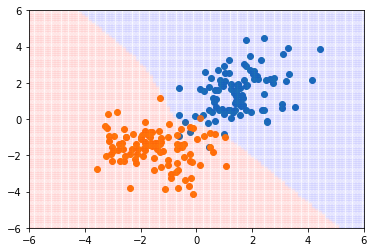

In [0]:
# TODO establecer los limites de la gráfica entre 6 y -6

# TODO plotear los datos contenidos en x0 y x1, teniendo en cuenta que son matrices


# TODO plotear el fondo gracias a los valores contenidos en las variables reds y en blues 
# establecer un alpha de al menos 0.05


In [0]:
np.random.seed(42)

n_points=100
noise = 0.25

n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

x0 = np.hstack((d1x,d1y))
d0 = np.repeat(0, n_points)
x1 = np.hstack((-d1x,-d1y))
d1 = np.repeat(1, n_points)

X = np.vstack((x0,x1))
d = np.hstack((d0,d1)).reshape(-1, 1)

# Entrenamiento
mlp = MLP([2,4,10,3,1])  # Poner la arquitectura (en forma de lista)
mlp.train(X, d, 0.1, 1000, trace=1000, verbose=True)

X = []
for x in np.linspace(-15, 15, 75):
    for y in np.linspace(-15, 15, 75):
        X.append((x, y))
X = np.array(X)
Y_hat = mlp.infer(X)
reds = X[(Y_hat>=0.5).squeeze(),:]
blues = X[(Y_hat<0.5).squeeze(),:]


Epoch: 1000; RMS: 0.47293856649073746; Accuracy: 0.5549999999999999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


**Ejercicio 2. Realizar el mismo proceso que en el apartado anterior**

**Ejercicio 3. Mezclar plot con scatter para obtener una gráfica conjunta**

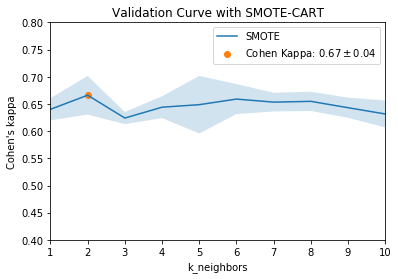

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection as ms
from sklearn import datasets, metrics, tree

from imblearn import over_sampling as os
from imblearn import pipeline as pl

RANDOM_STATE = 42

scorer = metrics.make_scorer(metrics.cohen_kappa_score)

# Generate the dataset
X, y = datasets.make_classification(n_classes=2, class_sep=2,
                                    weights=[0.1, 0.9], n_informative=10,
                                    n_redundant=1, flip_y=0, n_features=20,
                                    n_clusters_per_class=4, n_samples=5000,
                                    random_state=RANDOM_STATE)
smote = os.SMOTE(random_state=RANDOM_STATE)
cart = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)
pipeline = pl.make_pipeline(smote, cart)

param_range = range(1, 11)
train_scores, test_scores = ms.validation_curve(
    pipeline, X, y, param_name="smote__k_neighbors", param_range=param_range,
    cv=3, scoring=scorer, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

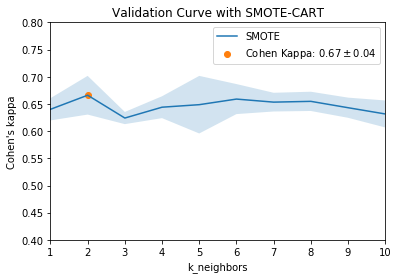

In [0]:
# TODO Generar el plot inicial con los datos de param_range y test_scores mean, adicionalmente incluir el label


ax.fill_between(param_range, test_scores_mean + test_scores_std,
                test_scores_mean - test_scores_std, alpha=0.2)
idx_max = np.argmax(test_scores_mean)

# TODO generar con scatter el punto de Cohen kappa 



# TODO generar el titulo, x e y label, xlim/ylim e incluir la leyenda


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))


**Ejercicio 4. Generar una gráfica como la siguiente**


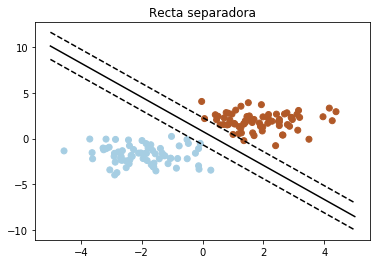

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
np.random.seed(0)
X = np.r_[np.random.randn(70, 2) - [2, 2], np.random.randn(70, 2) + [2, 2]]
Y = [0] * 70 + [1] * 70

#Se estima el modelo
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])



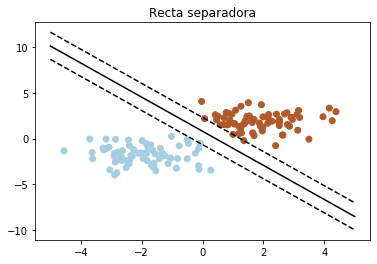

In [0]:
# TODO realizar tres lineas diferentes con xx como parametro comun y manejando yy, yy_down e yy_up


# TODO scatter de los puntos contenidos en clf.support_vectors_
